# Data Exploration - Price Data

Interactive exploration and validation of collected price data.

**Goals:**
- Validate data quality
- Explore price movements and patterns
- Test basic calculations (returns, volatility)
- Identify any data issues

In [1]:
# Setup
import sys
from pathlib import Path

# Add src to path
sys.path.insert(0, str(Path.cwd().parent))

import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plotting
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("Imports successful!")

Imports successful!


## 1. Load Data

In [2]:
# Load the full dataset
data_path = Path('../data/price/daily/sample_universe_2022-10-24_to_2025-10-23.parquet')
df = pl.read_parquet(data_path)

print(f"Loaded {len(df):,} rows")
print(f"Columns: {df.columns}")
print(f"\nShape: {df.shape}")
df.head()

Loaded 15,040 rows
Columns: ['symbol', 'date', 'open', 'high', 'low', 'close', 'adj_close', 'volume', 'dividends', 'stock_splits']

Shape: (15040, 10)


symbol,date,open,high,low,close,adj_close,volume,dividends,stock_splits
str,datetime[ns],f64,f64,f64,f64,f64,i64,f64,f64
"""MSFT""",2022-10-24 00:00:00,243.759995,247.839996,241.300003,247.25,241.248611,24911200,0.0,0.0
"""SNAP""",2022-10-24 00:00:00,7.58,8.57,7.49,8.31,8.31,161717500,0.0,0.0
"""CRWD""",2022-10-24 00:00:00,158.110001,158.699997,154.220001,157.970001,157.970001,2054900,0.0,0.0
"""GOOGL""",2022-10-24 00:00:00,101.800003,102.75,99.980003,102.519997,101.817749,27176400,0.0,0.0
"""MDB""",2022-10-24 00:00:00,188.929993,189.029999,176.684998,181.910004,181.910004,2170300,0.0,0.0


In [ ]:
df.with_columns(
    pl.col("date").dt.to_string("%Y-%m-%d").alias("ds")
    ).filter(pl.col("ds")=="2022-12-09")

symbol,date,open,high,low,close,adj_close,volume,dividends,stock_splits,ds
str,datetime[ns],f64,f64,f64,f64,f64,i64,f64,f64,str
"""MSFT""",2022-12-09 00:00:00,244.699997,248.309998,244.160004,245.419998,240.137894,20609700,0.0,0.0,"""2022-12-09"""
"""SNAP""",2022-12-09 00:00:00,9.16,9.618,9.01,9.45,9.45,19248300,0.0,0.0,"""2022-12-09"""
"""CRWD""",2022-12-09 00:00:00,113.760002,117.0,112.949997,115.080002,115.080002,3014600,0.0,0.0,"""2022-12-09"""
"""GOOGL""",2022-12-09 00:00:00,93.769997,94.260002,92.75,92.830002,92.194122,28225400,0.0,0.0,"""2022-12-09"""
"""MDB""",2022-12-09 00:00:00,194.600006,198.410004,190.740005,191.75,191.75,2708400,0.0,0.0,"""2022-12-09"""
…,…,…,…,…,…,…,…,…,…,…
"""JNJ""",2022-12-09 00:00:00,177.119995,177.889999,175.660004,175.740005,161.438004,4561000,0.0,0.0,"""2022-12-09"""
"""WMT""",2022-12-09 00:00:00,49.156666,49.240002,48.406666,48.436668,46.792099,27929400,0.0,0.0,"""2022-12-09"""
"""DIS""",2022-12-09 00:00:00,92.370003,94.910004,91.900002,93.379997,91.848808,10111900,0.0,0.0,"""2022-12-09"""


## 2. Data Quality Checks

In [12]:
# Basic statistics
print("=== DATA SUMMARY ===")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Number of symbols: {df['symbol'].n_unique()}")
print(f"\nSymbols: {sorted(df['symbol'].unique().to_list())}")

# Check for missing values
print("\n=== MISSING VALUES ===")
null_counts = df.null_count()
print(null_counts)

# Rows per symbol
print("\n=== ROWS PER SYMBOL ===")
rows_per_symbol = df.group_by('symbol').agg(pl.len().alias('count')).sort('count', descending=True)
print(rows_per_symbol)

=== DATA SUMMARY ===
Date range: 2022-10-24 00:00:00 to 2025-10-22 00:00:00
Number of symbols: 20

Symbols: ['AAPL', 'BA', 'CRWD', 'DDOG', 'DIS', 'GOOGL', 'JNJ', 'JPM', 'MDB', 'META', 'MSFT', 'NET', 'NFLX', 'NKE', 'NVDA', 'PG', 'SNAP', 'TSLA', 'WMT', 'XOM']

=== MISSING VALUES ===
shape: (1, 10)
┌────────┬──────┬──────┬──────┬───┬───────────┬────────┬───────────┬──────────────┐
│ symbol ┆ date ┆ open ┆ high ┆ … ┆ adj_close ┆ volume ┆ dividends ┆ stock_splits │
│ ---    ┆ ---  ┆ ---  ┆ ---  ┆   ┆ ---       ┆ ---    ┆ ---       ┆ ---          │
│ u32    ┆ u32  ┆ u32  ┆ u32  ┆   ┆ u32       ┆ u32    ┆ u32       ┆ u32          │
╞════════╪══════╪══════╪══════╪═══╪═══════════╪════════╪═══════════╪══════════════╡
│ 0      ┆ 0    ┆ 0    ┆ 0    ┆ … ┆ 0         ┆ 0      ┆ 0         ┆ 0            │
└────────┴──────┴──────┴──────┴───┴───────────┴────────┴───────────┴──────────────┘

=== ROWS PER SYMBOL ===
shape: (20, 2)
┌────────┬───────┐
│ symbol ┆ count │
│ ---    ┆ ---   │
│ str    ┆ u32   │

In [13]:
# Check for negative prices (should be none)
price_cols = ['open', 'high', 'low', 'close', 'adj_close']
for col in price_cols:
    neg_count = df.filter(pl.col(col) < 0).height
    if neg_count > 0:
        print(f"WARNING: {neg_count} negative values in {col}")
    else:
        print(f"✓ {col}: No negative values")

# Check high >= low
invalid_hl = df.filter(pl.col('high') < pl.col('low')).height
print(f"\n{'✓' if invalid_hl == 0 else '✗'} High >= Low: {invalid_hl} violations")

✓ open: No negative values
✓ high: No negative values
✓ low: No negative values
✓ close: No negative values
✓ adj_close: No negative values

✓ High >= Low: 0 violations


## 3. Price Movement Analysis

In [14]:
# Calculate basic metrics
df_metrics = df.with_columns([
    # Daily return using adj_close
    (pl.col('adj_close').pct_change().over('symbol')).alias('daily_return'),
    # Daily range
    ((pl.col('high') - pl.col('low')) / pl.col('close')).alias('daily_range_pct'),
    # Volume in millions
    (pl.col('volume') / 1_000_000).alias('volume_millions')
])

print("Metrics calculated!")
df_metrics.select(['symbol', 'date', 'adj_close', 'daily_return', 'daily_range_pct']).head(10)

Metrics calculated!


symbol,date,adj_close,daily_return,daily_range_pct
str,datetime[ns],f64,f64,f64
"""MSFT""",2022-10-24 00:00:00,241.248611,null,0.026451
"""SNAP""",2022-10-24 00:00:00,8.31,null,0.129964
"""CRWD""",2022-10-24 00:00:00,157.970001,null,0.02836
"""GOOGL""",2022-10-24 00:00:00,101.817749,null,0.027019
"""MDB""",2022-10-24 00:00:00,181.910004,null,0.067863
"""NFLX""",2022-10-24 00:00:00,282.450012,null,0.035865
"""NVDA""",2022-10-24 00:00:00,12.583881,null,0.051274
"""TSLA""",2022-10-24 00:00:00,211.25,null,0.07058
"""META""",2022-10-24 00:00:00,128.925201,null,0.068686


In [15]:
# Summary statistics by symbol
summary = df_metrics.group_by('symbol').agg([
    pl.col('daily_return').mean().alias('avg_daily_return'),
    pl.col('daily_return').std().alias('volatility'),
    pl.col('volume_millions').mean().alias('avg_volume_M'),
    pl.col('adj_close').min().alias('min_price'),
    pl.col('adj_close').max().alias('max_price'),
]).sort('volatility', descending=True)

print("\n=== SUMMARY BY SYMBOL ===")
print(summary)


=== SUMMARY BY SYMBOL ===
shape: (20, 6)
┌────────┬──────────────────┬────────────┬──────────────┬────────────┬────────────┐
│ symbol ┆ avg_daily_return ┆ volatility ┆ avg_volume_M ┆ min_price  ┆ max_price  │
│ ---    ┆ ---              ┆ ---        ┆ ---          ┆ ---        ┆ ---        │
│ str    ┆ f64              ┆ f64        ┆ f64          ┆ f64        ┆ f64        │
╞════════╪══════════════════╪════════════╪══════════════╪════════════╪════════════╡
│ MDB    ┆ 0.001599         ┆ 0.041117   ┆ 1.857295     ┆ 137.350006 ┆ 500.899994 │
│ SNAP   ┆ 0.000731         ┆ 0.039874   ┆ 35.122524    ┆ 6.99       ┆ 17.450001  │
│ TSLA   ┆ 0.00173          ┆ 0.039071   ┆ 111.791552   ┆ 108.099998 ┆ 479.859985 │
│ NET    ┆ 0.002512         ┆ 0.03744    ┆ 3.78847      ┆ 37.84      ┆ 228.279999 │
│ NVDA   ┆ 0.004073         ┆ 0.032618   ┆ 375.226097   ┆ 12.583881  ┆ 192.570007 │
│ …      ┆ …                ┆ …          ┆ …            ┆ …          ┆ …          │
│ XOM    ┆ 0.000341         ┆ 0.01

## 4. Visualizations

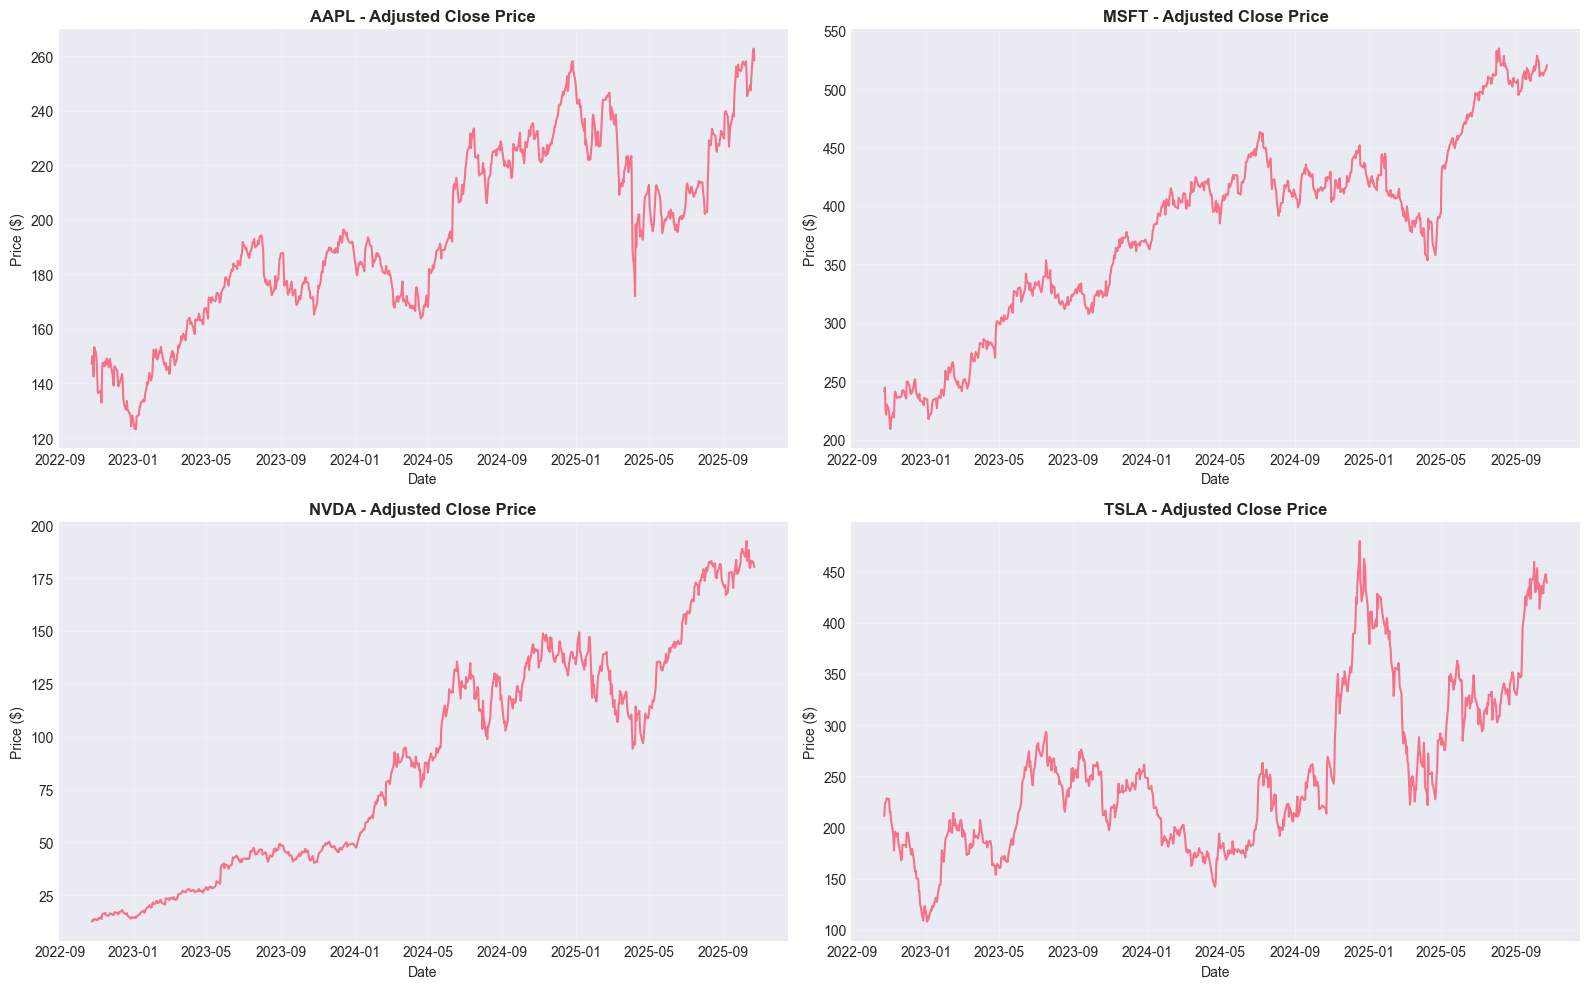

In [16]:
# Plot price evolution for a few stocks
sample_symbols = ['AAPL', 'MSFT', 'NVDA', 'TSLA']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for idx, symbol in enumerate(sample_symbols):
    symbol_data = df_metrics.filter(pl.col('symbol') == symbol).sort('date')
    
    ax = axes[idx]
    ax.plot(symbol_data['date'].to_pandas(), symbol_data['adj_close'].to_pandas(), linewidth=1.5)
    ax.set_title(f'{symbol} - Adjusted Close Price', fontsize=12, fontweight='bold')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price ($)')
    ax.grid(True, alpha=0.3)
    
plt.tight_layout()
plt.show()

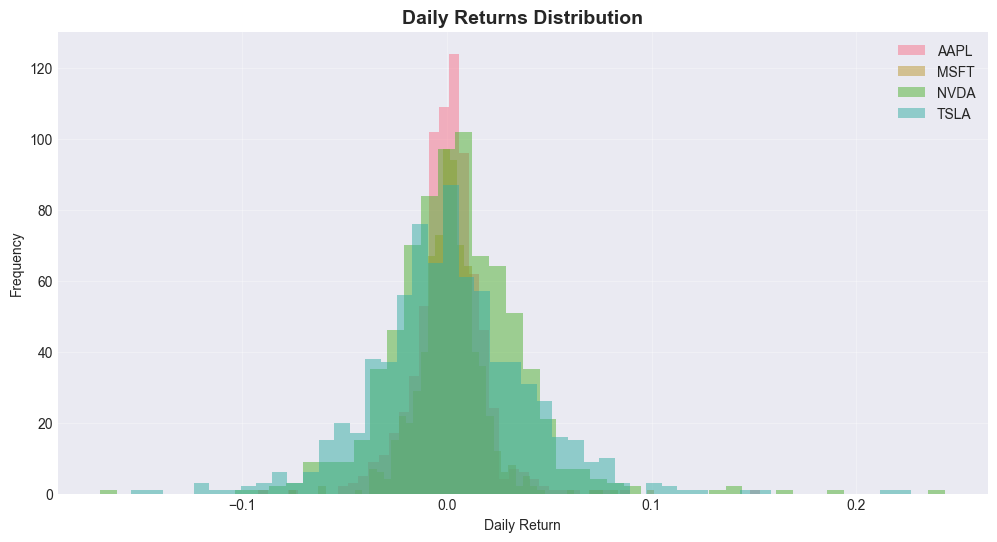

In [17]:
# Daily returns distribution
fig, ax = plt.subplots(figsize=(12, 6))

for symbol in sample_symbols:
    symbol_data = df_metrics.filter(pl.col('symbol') == symbol)
    returns = symbol_data['daily_return'].drop_nulls().to_pandas()
    ax.hist(returns, bins=50, alpha=0.5, label=symbol)

ax.set_title('Daily Returns Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Daily Return')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

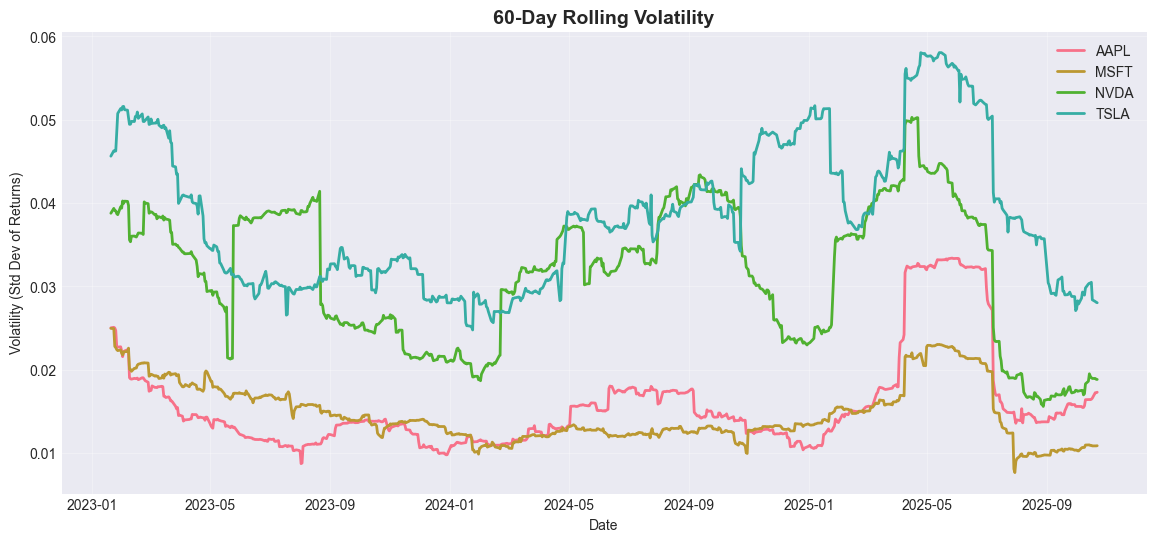

In [18]:
# Volatility comparison (last 60 days rolling)
fig, ax = plt.subplots(figsize=(14, 6))

for symbol in sample_symbols:
    symbol_data = df_metrics.filter(pl.col('symbol') == symbol).sort('date')
    
    # Calculate 60-day rolling volatility
    volatility = (
        symbol_data
        .select([
            'date',
            pl.col('daily_return').rolling_std(window_size=60).alias('volatility_60d')
        ])
    )
    
    ax.plot(volatility['date'].to_pandas(), volatility['volatility_60d'].to_pandas(), label=symbol, linewidth=2)

ax.set_title('60-Day Rolling Volatility', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Volatility (Std Dev of Returns)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

## 5. Adjusted vs Unadjusted Close

In [19]:
# Check for splits and dividends
splits = df.filter(pl.col('stock_splits') > 0)
dividends = df.filter(pl.col('dividends') > 0)

print(f"Stock splits: {splits.height} events")
print(f"Dividends: {dividends.height} events")

if splits.height > 0:
    print("\nStock split events:")
    print(splits.select(['symbol', 'date', 'stock_splits', 'close', 'adj_close']))

if dividends.height > 0:
    print("\nSample dividend events:")
    print(dividends.select(['symbol', 'date', 'dividends', 'close', 'adj_close']).head(10))

Stock splits: 2 events
Dividends: 124 events

Stock split events:
shape: (2, 5)
┌────────┬─────────────────────┬──────────────┬────────────┬───────────┐
│ symbol ┆ date                ┆ stock_splits ┆ close      ┆ adj_close │
│ ---    ┆ ---                 ┆ ---          ┆ ---        ┆ ---       │
│ str    ┆ datetime[ns]        ┆ f64          ┆ f64        ┆ f64       │
╞════════╪═════════════════════╪══════════════╪════════════╪═══════════╡
│ WMT    ┆ 2024-02-26 00:00:00 ┆ 3.0          ┆ 59.599998  ┆ 58.454613 │
│ NVDA   ┆ 2024-06-10 00:00:00 ┆ 10.0         ┆ 121.790001 ┆ 121.73468 │
└────────┴─────────────────────┴──────────────┴────────────┴───────────┘

Sample dividend events:
shape: (10, 5)
┌────────┬─────────────────────┬───────────┬────────────┬────────────┐
│ symbol ┆ date                ┆ dividends ┆ close      ┆ adj_close  │
│ ---    ┆ ---                 ┆ ---       ┆ ---        ┆ ---        │
│ str    ┆ datetime[ns]        ┆ f64       ┆ f64        ┆ f64        │
╞════════╪══

In [20]:
# Calculate adjustment ratio
df_adj = df.with_columns([
    ((pl.col('adj_close') / pl.col('close')) - 1.0).alias('adjustment_ratio')
])

# Find significant adjustments
significant_adj = df_adj.filter(pl.col('adjustment_ratio').abs() > 0.01)
print(f"\nRows with >1% adjustment: {significant_adj.height}")
if significant_adj.height > 0:
    print(significant_adj.select(['symbol', 'date', 'close', 'adj_close', 'adjustment_ratio', 'dividends', 'stock_splits']).head(20))


Rows with >1% adjustment: 4649
shape: (20, 7)
┌────────┬──────────────┬────────────┬────────────┬──────────────────┬───────────┬──────────────┐
│ symbol ┆ date         ┆ close      ┆ adj_close  ┆ adjustment_ratio ┆ dividends ┆ stock_splits │
│ ---    ┆ ---          ┆ ---        ┆ ---        ┆ ---              ┆ ---       ┆ ---          │
│ str    ┆ datetime[ns] ┆ f64        ┆ f64        ┆ f64              ┆ f64       ┆ f64          │
╞════════╪══════════════╪════════════╪════════════╪══════════════════╪═══════════╪══════════════╡
│ MSFT   ┆ 2022-10-24   ┆ 247.25     ┆ 241.248611 ┆ -0.024273        ┆ 0.0       ┆ 0.0          │
│        ┆ 00:00:00     ┆            ┆            ┆                  ┆           ┆              │
│ JPM    ┆ 2022-10-24   ┆ 122.379997 ┆ 113.659988 ┆ -0.071254        ┆ 0.0       ┆ 0.0          │
│        ┆ 00:00:00     ┆            ┆            ┆                  ┆           ┆              │
│ PG     ┆ 2022-10-24   ┆ 129.369995 ┆ 120.772415 ┆ -0.066457        ┆ 

## 6. Custom Analysis Space

Use this section for ad-hoc exploration

In [ ]:
# Your custom analysis here
# Example: Calculate 30-day forward returns

df_forward = df.sort(['symbol', 'date']).with_columns([
    # 30-day forward return
    ((pl.col('adj_close').shift(-20) / pl.col('adj_close')) - 1.0)
    .over('symbol')
    .alias('forward_20d_return')
])

# Show distribution of forward returns
print("30-day forward return statistics:")
print(df_forward['forward_20d_return'].describe())

In [ ]:
# Save any processed data if needed
# df_processed.write_parquet('../data/processed/my_analysis.parquet')